In [1]:
print('Hello world')

Hello world


In [4]:
x=2+2
print(x)

4


In [5]:
print('can you see this on github?')

can you see this on github?


In [6]:
x=1+2
print(x)

3


In [9]:
import sys
import numpy as np
import scipy.stats
import pylab as plt
import scipy
import scipy.stats as stats

plt.rcParams['figure.figsize'] = [8, 8]

In [3]:
xmax = 4
xmin = 0.3
# random points in the unorm distribution
xi=np.random.uniform(xmin,xmax, 100000)

# function to integrate
def fun(x):
    return np.exp(x)*(4*x+3)**0.5 * np.log(x**6)/np.tanh(x)
# approximate integral using Monte Carlo
integral = (xmax-xmin) * np.mean(fun(xi))

print(integral)

1380.4761940101712


In [10]:
# Based on Ivezic v2, Figure 6.8; edited by G. T. Richards, S. R. Taylor, and D. Gerosa +PDM 2025/2026

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

# --- Universal, LaTeX-free plotting setup (safe on any system) ---
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KernelDensity
from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

# Compatibility patch for astroML / NumPy >= 1.24
if not hasattr(np, "bool"):
    np.bool = bool

# Consistent, publication-quality plot style
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "text.usetex": False,   # explicitly disable LaTeX rendering
    "figure.figsize": (6, 4),
    "figure.dpi": 100
})

%config InlineBackend.figure_format = 'retina'
print('hey')

hey


In [11]:
# Generate our data: a mix of several Cauchy distributions (see Chapter 3.3.5)
# In reality nature generates data for you

random_state = np.random.RandomState(seed=0)
N = 2000 # number of data points--> you can make this larger if you want a smoother result.
#define an array of (mu, gamma, f) tuples
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
#generate the true distribution function using the array above
hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
#generate random samples from the true distribution function
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
                    for (mu, gamma, f) in mu_gamma_f])
# Shuffle and trim the data to a reasonable range
random_state.shuffle(x)
x = x[x > -10]
x = x[x < 30]

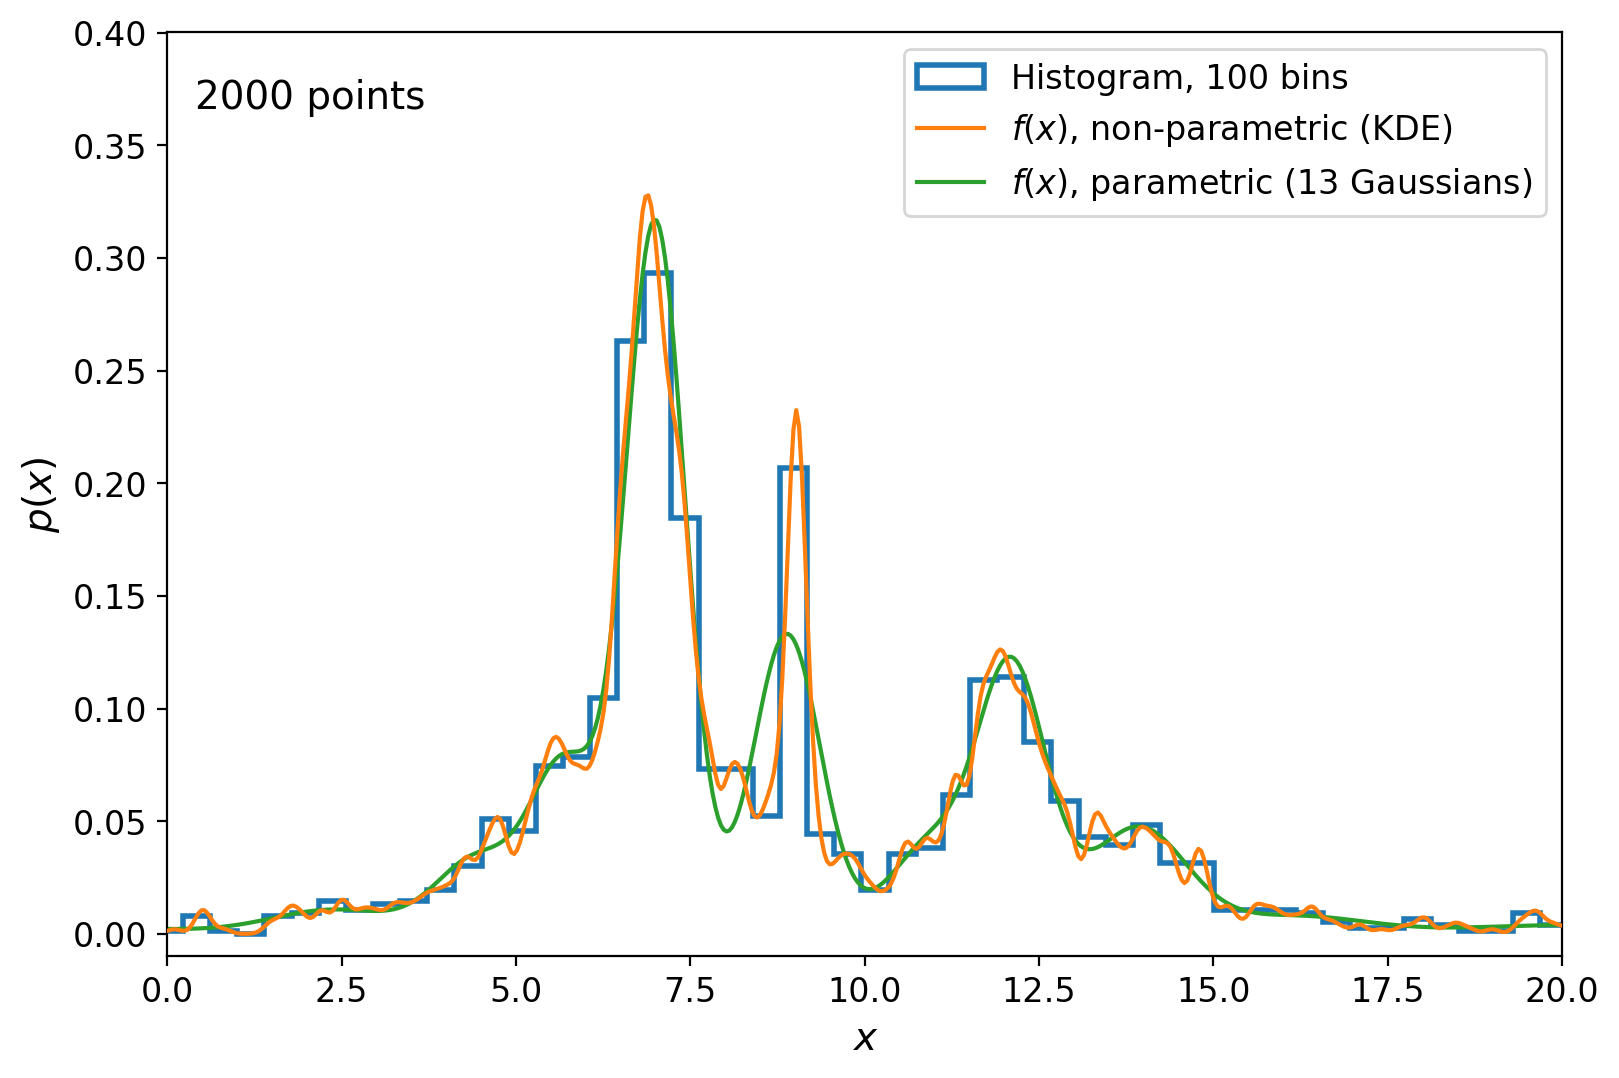

In [12]:
# plot the results
fig,ax = plt.subplots(figsize=(9, 6))
xgrid = np.linspace(-10, 30, 1000)

# True distribution: you typically don't have it! Only have the samples!
if False:
    ax.plot(xgrid, hx(xgrid), ':', color='black', zorder=3,
            label="$h(x)$, Generating Distribution")

# A simple histogram
# But try changing the number of bins!
if True:
    ax.hist(x,density=True,color='C0',bins=100,histtype='step',lw=2, label='Histogram, 100 bins')

# Something more sophisticated: Kernel Density Estimation, see section 6.1.1
# But try changing the bandwith! 
if True:
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(x[:, None])
    dens_kde = np.exp(kde.score_samples(xgrid[:, None]))
    ax.plot(xgrid, dens_kde, '-', color='C1', zorder=3,
            label="$f(x)$, non-parametric (KDE)")

# Use Gaussian Mixtures with a pre-defined number of clusters (13), see section 6.3.1
if True:
    gmm = GaussianMixture(n_components=13).fit(x.reshape(-1, 1))
    logprob = gmm.score_samples(xgrid.reshape(-1, 1))
    fx = lambda j : np.exp(gmm.score_samples(j.reshape(-1, 1)))
    ax.plot(xgrid, fx(np.array(xgrid)), '-', color='C2',
            label="$f(x)$, parametric (13 Gaussians)")

# Plot cosmetics
ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)

ax.set_ylabel('$p(x)$',fontsize=14)
ax.legend(loc='upper right')

ax.set_xlabel('$x$',fontsize=14)
ax.set_xlim(0, 20)
ax.set_ylim(-0.01, 0.4001)

plt.show()